In [276]:
import Quandl
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

## Potential data scrubbing problems
 - mismatched dates
 - down/up sampling
 - NaN values


In [277]:
patents = Quandl.get("USPTO/PAT_ACT")

In [278]:
patents.tail()

,Utility Applications,Design Applications,Plant Applications,Utility Patents,Design Patents,Plant Patents,Patent Grants to Foreign Residents
Year,,,,,,,
2010-12-31,490226.0,29059.0,992.0,219614.0,22799.0,981.0,122694.0
2011-12-31,503582.0,30467.0,1139.0,224505.0,21356.0,823.0,125998.0
2012-12-31,542815.0,32799.0,1149.0,253155.0,21951.0,860.0,142180.0
2013-12-31,571612.0,36034.0,1406.0,277835.0,23468.0,847.0,154891.0
2014-12-31,578802.0,35378.0,1063.0,300678.0,23657.0,1072.0,167000.0


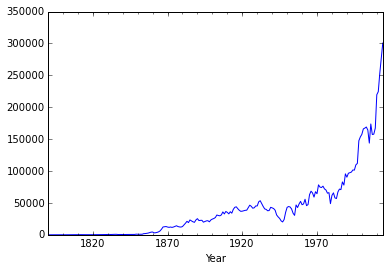

In [279]:
patents = patents["Utility Patents"]
patents.plot()

## R&D spending as a factor

In [280]:
rd = Quandl.get("NSF/IND_R_D")

In [281]:
rd.head()

,All Sources (Current $),All Sources (Constant $),Federal (Current $),Federal (Constant $),Company & Other (Current $),Company & Other (Constant $)
Year,,,,,,
1953-12-31,3630.0,19901.0,1430.0,7840.0,2200.0,12061.0
1954-12-31,4070.0,22096.0,1750.0,9501.0,2320.0,12595.0
1955-12-31,4640.0,24747.0,2180.0,11627.0,2460.0,13120.0
1956-12-31,6605.0,34064.0,3328.0,17163.0,3277.0,16900.0
1957-12-31,7731.0,38578.0,4335.0,21632.0,3396.0,16946.0


In [282]:
rd = rd['All Sources (Current $)']
rd.name = 'R&D Spending'

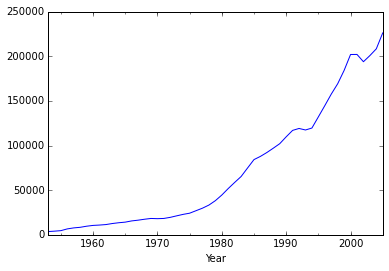

In [283]:
rd.plot()

In [284]:
factors = pd.concat([rd], 1)

In [285]:
factors = factors.ffill().dropna()

In [286]:
factors.tail()

,R&D Spending
Year,
2001-12-31,202017.0
2002-12-31,193868.0
2003-12-31,200724.0
2004-12-31,208301.0
2005-12-31,226159.0


In [287]:
def trim_data(target, factors):
    start = np.max([factors.index.min(), patents.index.min()])
    end = np.min([factors.index.max(), patents.index.max()])
    
    factors = factors[start:end]
    target = target[start:end]
    
    return target, factors

In [288]:
patents, factors = trim_data(patents, factors)

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


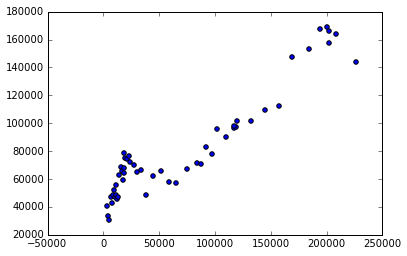

In [289]:
plt.scatter(factors["R&D Spending"], patents);

## Run a quick regression

In [290]:
model_factors = sm.add_constant(factors)
model = sm.OLS(patents, model_factors)
results = model.fit()

In [292]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Utility Patents   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     376.8
Date:                Wed, 23 Nov 2016   Prob (F-statistic):           3.30e-25
Time:                        22:39:40   Log-Likelihood:                -576.96
No. Observations:                  53   AIC:                             1158.
Df Residuals:                      51   BIC:                             1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const         4.484e+04   2629.162     17.054      0.000      3.96e+04  5.01e+04
R&D Spending     0.5163      0.027     19.412      0.000         0.463     0.570
==============================================================================
Omnibus:                       13.978   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.542
Skew:                           0.179   Prob(JB):                        0.170
Kurtosis:                       1.785   Cond. No.                     1.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Maybe corporate taxes

In [293]:
taxes = Quandl.get("TPC/G7_HIST_CORP")

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


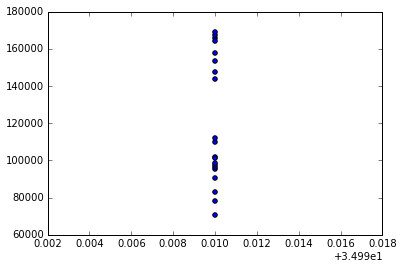

In [294]:
plt.scatter(taxes["US"][-20:], patents[-20:]);

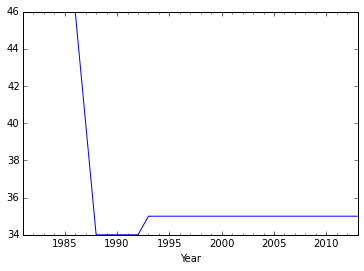

In [295]:
taxes["US"].plot()

# What can affect the results that is hard to model?

- presidential election, changing patent laws, etc.

# Things to keep in mind
- Are we observing the effects or the driver?
- Correlated regressors?
- Guard against overfitting
- Are we trying to predict the right thing? Should we be trying to predict the growth rate of patents?


# Tools

- stata? python?

- which ecosystem will best fulfill our needs?


# Next steps

- Feature selection
- Split training and testing dataset
- Fit model
- Cross validation
- Validate model on other countries

# Future...

- Train an ML model (logistic regression, boosting, etc.)